In [1]:
import rydanalysis
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [20]:
import seaborn as sns

In [21]:
sns.set_style("darkgrid")

Open an existing raw_data (h5/netcdf) file.

In [3]:
ds = xr.open_dataset("/media/david/projects/2020_general/January/27/02_depletion_tof06_Pr600muW_Pblue55mW - merged/raw_data.h5")

Define necessary parameters

In [4]:
key_image_abs = 'image_01'
key_image_ref = 'image_03'
n_components = 10
xslice = slice(8,45)
yslice = slice(2,246)

In [8]:
# select arrays from dataset
im_a = ds[key_image_abs][:,xslice,yslice]
im_r = ds[key_image_ref][:,xslice,yslice]


Create mask on region of interest.

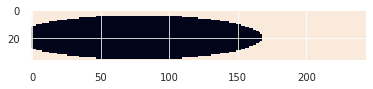

In [58]:
mask = rydanalysis.elliptical_mask(im_r[0].shape,x0=20,y0=78,a=16,b=90)
plt.imshow(mask)

## Application example
Here the magic happens:

In [59]:
ref = rydanalysis.ref_images_truncated_svd(im_r.values,im_a.values,mask=mask,n_components=10)

## Benchmark

In [69]:
tslice = slice(0,10)
# select arrays from dataset
im_a = ds[key_image_abs][tslice,xslice,yslice]
im_r = ds[key_image_ref][:,xslice,yslice]
n_components_arr = np.linspace(2,50,10)
dev_list = list()
for n in n_components_arr:
    ref = rydanalysis.ref_images_truncated_svd(im_r.values,im_a.values,mask=mask,n_components=int(n))
    trans = im_a.astype(float).values/ref
    dev = np.abs(trans-1).mean(axis=0)[mask]
    dev_list.append(np.mean(dev))

In [70]:
dev0 = np.abs(1 - im_a.astype(float)/im_r[tslice]).mean(axis=0)
dev0 = dev0.values[mask].mean()

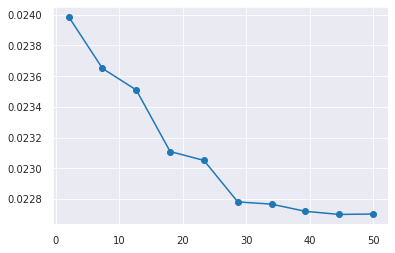

In [72]:
plt.plot(n_components_arr, dev_list, 'o-')
#plt.plot(n_components_arr, np.full_like(n_components_arr, dev0))

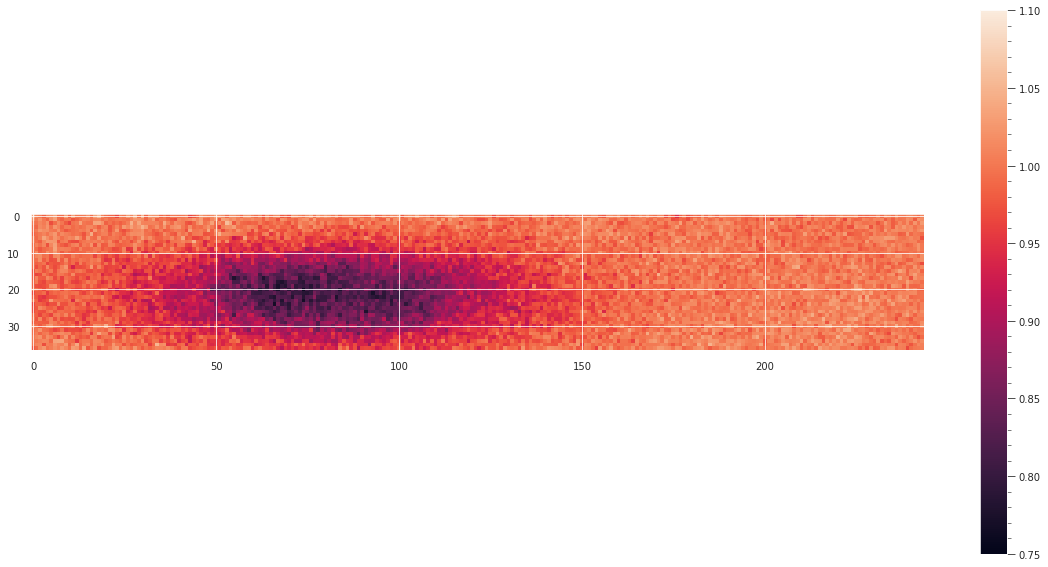

In [67]:
plt.figure(figsize=(20,10))
plt.imshow(trans[1], vmin=0.75,vmax=1.1)
plt.colorbar()

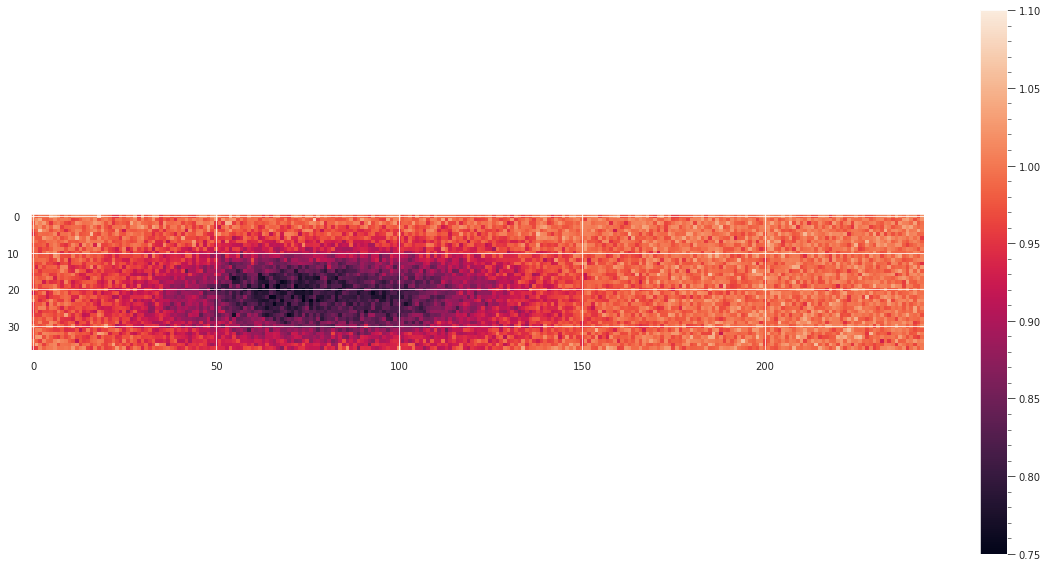

In [68]:
plt.figure(figsize=(20,10))
plt.imshow(im_a[1]/im_r[1], vmin=0.75,vmax=1.1)
plt.colorbar()

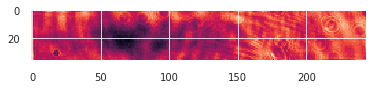

In [53]:
plt.imshow(im_a[0])